In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown
from scipy.stats import normaltest
from scipy.stats import norm

df=pd.read_csv("anggur.csv")

# Deskripsi Statistika

## Mean, Median, Standar Deviasi, Variansi, Range, Nilai Minimum, Nilai Maksimum, Kuartil 1, Kuartil 2, Kuartil 3, IQR, Skewness, Kurtosis

In [45]:
target = df.drop(["quality"], axis=1)

deskStat = pd.DataFrame()
deskStat["Mean"] = target.mean()
deskStat["Media"] = target.median()
deskStat["Standar Deviasi"] = target.std()
deskStat["Variansi"] = target.var()
deskStat["Range"] = target.max()-target.min()
deskStat["Min"] = target.min()
deskStat["Max"] = target.max()
deskStat["Q1"] = target.quantile(0.25)
deskStat["Q2"] = target.quantile(0.50)
deskStat["Q3"] = target.quantile(0.75)
deskStat["IQR"] = target.quantile(0.75) - target.quantile(0.25)
deskStat["Skewness"] = target.skew()
deskStat["Kurtosis"] = target.kurtosis()

deskStat

,Mean,Media,Standar Deviasi,Variansi,Range,Min,Max,Q1,Q2,Q3,IQR,Skewness,Kurtosis
fixed acidity,7.152530,7.150000,1.201598,1.443837,8.170000,3.320000,11.490000,6.377500,7.150000,8.000000,1.622500,-0.028879,-0.019292
volatile acidity,0.520839,0.524850,0.095848,0.009187,0.665200,0.139900,0.805100,0.456100,0.524850,0.585375,0.129275,-0.197699,0.161853
citric acid,0.270517,0.272200,0.049098,0.002411,0.292900,0.116700,0.409600,0.237800,0.272200,0.302325,0.064525,-0.045576,-0.104679
residual sugar,2.567104,2.519430,0.987915,0.975977,5.518200,0.032555,5.550755,1.896330,2.519430,3.220873,1.324544,0.132638,-0.042980
chlorides,0.081195,0.082167,0.020111,0.000404,0.125635,0.015122,0.140758,0.066574,0.082167,0.095312,0.028738,-0.051319,-0.246508
free sulfur dioxide,14.907679,14.860346,4.888100,23.893519,27.267847,0.194679,27.462525,11.426717,14.860346,18.313098,6.886381,0.007130,-0.364964
total sulfur dioxide,40.290150,40.190000,9.965767,99.316519,66.810000,3.150000,69.960000,33.785000,40.190000,47.022500,13.237500,-0.024060,0.063950
density,0.995925,0.996000,0.002020,0.000004,0.013800,0.988800,1.002600,0.994600,0.996000,0.997200,0.002600,-0.076883,0.016366
pH,3.303610,3.300000,0.104875,0.010999,0.740000,2.970000,3.710000,3.230000,3.300000,3.370000,0.140000,0.147673,0.080910
sulphates,0.598390,0.595000,0.100819,0.010164,0.670000,0.290000,0.960000,0.530000,0.595000,0.670000,0.140000,0.149199,0.064819


## Modus

In [46]:
target.mode()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.54,0.5546,0.3019,0.032555,0.015122,0.194679,35.20,0.9959,3.34,0.59,9.86
1,NaN,NaN,NaN,0.033333,0.020794,0.621628,37.25,0.9961,NaN,NaN,10.31
2,NaN,NaN,NaN,0.051774,0.024259,0.860177,39.64,0.9965,NaN,NaN,NaN
3,NaN,NaN,NaN,0.077156,0.027209,3.032139,40.61,0.9970,NaN,NaN,NaN
4,NaN,NaN,NaN,0.084744,0.032111,3.129885,41.05,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,5.210260,0.131425,26.630490,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,5.217429,0.133656,26.665773,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,5.252864,0.135368,26.822626,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,5.299524,0.135790,27.006307,NaN,NaN,NaN,NaN,NaN


# Visualisasi plot distribusi

In [47]:
def histAndBox(col):
    plt.subplot(1,2,1)
    df[str(col)].plot.hist(edgecolor='black')
    plt.title(col)

    plt.subplot(1, 2, 2)
    df.boxplot(column=str(col))
    plt.title(col)
    plt.show()

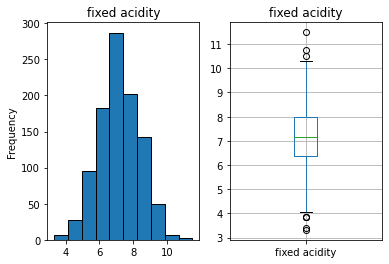

In [44]:
histAndBox("fixed acidity")

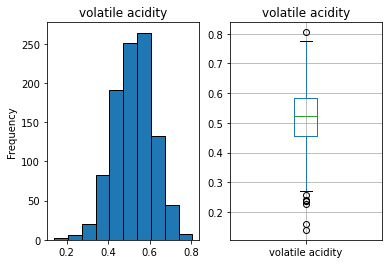

In [45]:
histAndBox("volatile acidity")

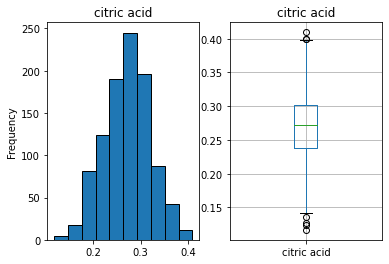

In [47]:
histAndBox("citric acid")

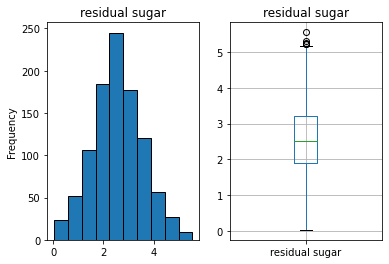

In [48]:
histAndBox("residual sugar")

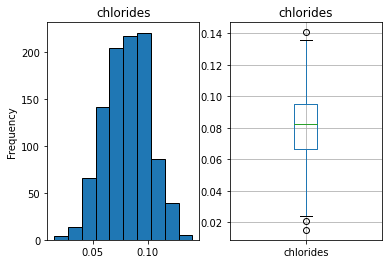

In [49]:
histAndBox("chlorides")

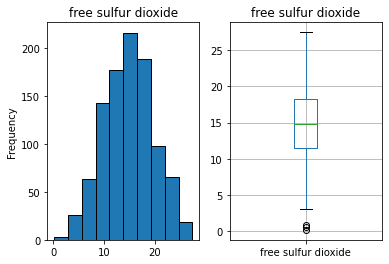

In [50]:
histAndBox("free sulfur dioxide")

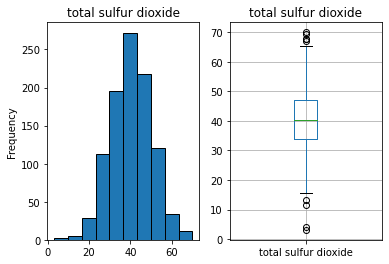

In [51]:
histAndBox("total sulfur dioxide")

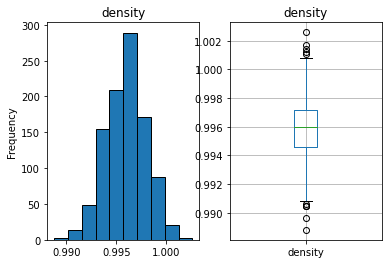

In [52]:
histAndBox("density")

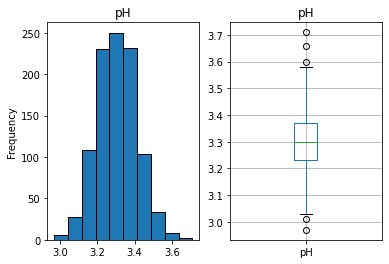

In [53]:
histAndBox("pH")

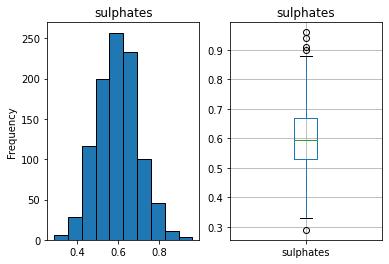

In [54]:
histAndBox("sulphates")

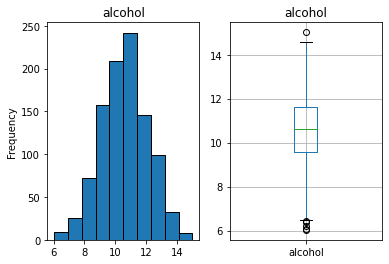

In [55]:
histAndBox("alcohol")

# fixed acidity

Normality test statistic: 0.14329615661430725
p-value: 0.9308584274486692
fixed acidity berdistribusi normal.


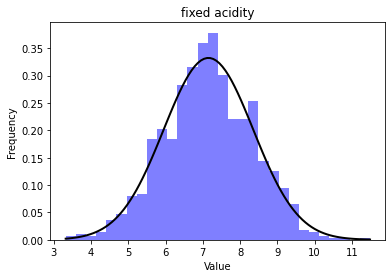

# volatile acidity

Normality test statistic: 7.581251985533493
p-value: 0.022581461594113835
volatile acidity tidak berdistribusi normal.


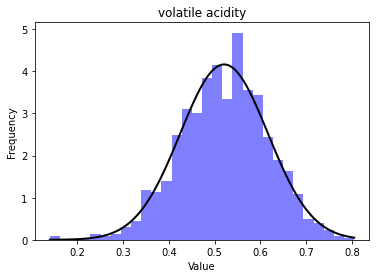

# citric acid

Normality test statistic: 0.7663607229418252
p-value: 0.6816899375976969
citric acid berdistribusi normal.


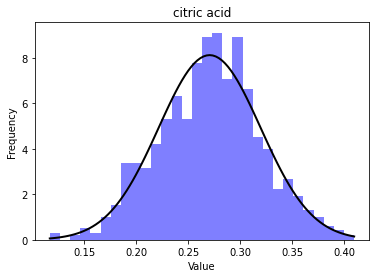

# residual sugar

Normality test statistic: 2.9862716504538622
p-value: 0.22466703321310558
residual sugar berdistribusi normal.


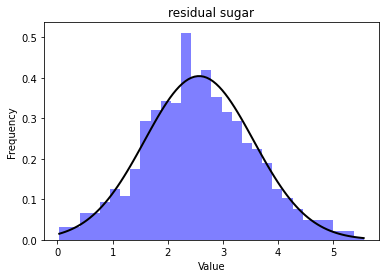

# chlorides

Normality test statistic: 3.538242355484952
p-value: 0.17048274704296862
chlorides berdistribusi normal.


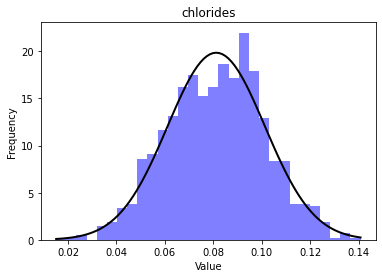

# free sulfur dioxide

Normality test statistic: 8.099074980855514
p-value: 0.01743043451827735
free sulfur dioxide tidak berdistribusi normal.


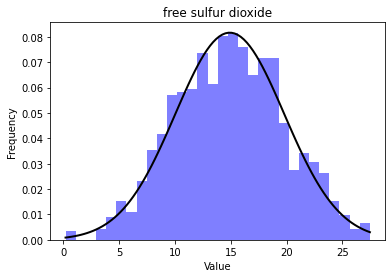

# total sulfur dioxide

Normality test statistic: 0.3276640291639825
p-value: 0.8488846101395726
total sulfur dioxide berdistribusi normal.


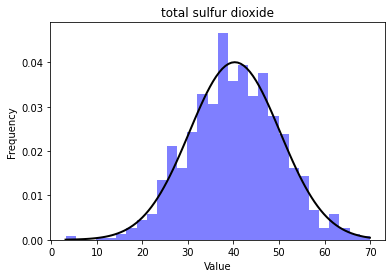

# density

Normality test statistic: 1.026581544320803
p-value: 0.5985227325531981
density berdistribusi normal.


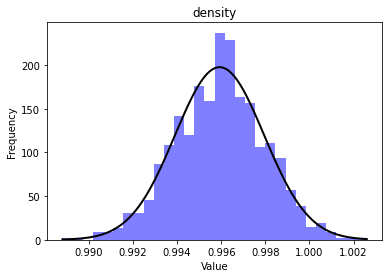

# pH

Normality test statistic: 3.9786546459928545
p-value: 0.13678740824860436
pH berdistribusi normal.


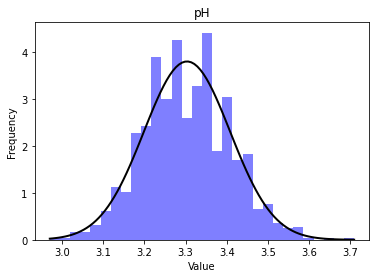

# sulphates

Normality test statistic: 3.948820277859041
p-value: 0.13884318628391681
sulphates berdistribusi normal.


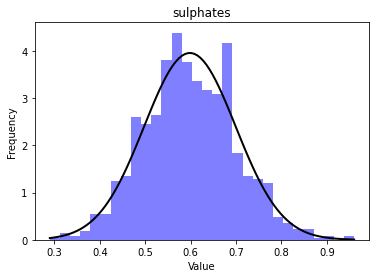

# alcohol

Normality test statistic: 0.7740076714171271
p-value: 0.6790884901361043
alcohol berdistribusi normal.


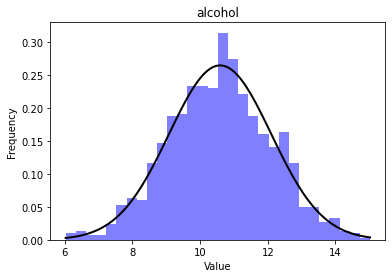

In [49]:
def normality_test(col):
    statistic, p_value = normaltest(df[col])
    data = df[col]

    display(Markdown(("# %s" %(col))))
    print('Normality test statistic:', statistic)
    print('p-value:', p_value)

    if p_value < 0.05:
        print(col, "tidak berdistribusi normal.")
    else:
        print(col, "berdistribusi normal.")

    plt.hist(data, bins=30, density=True, alpha=0.5, color='blue')

    mu, std = norm.fit(data) # mendapatkan mean dan standar deviasi
    x = np.linspace(min(data), max(data), 100)
    p = norm.pdf(x, mu, std) # Probability Densitiy Function
    plt.plot(x, p, 'k', linewidth=2)

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(col)

    plt.show()
    print()
    
for col in target.columns:
    normality_test(col)